In [48]:
import pandas as pd
import datetime as dt
import numpy as np
import missingno as msno

In [1]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
#reading the data into jobs dataframe
jobs=pd.read_csv(r"D:\Uncleaned_DS_jobs.csv")
jobs

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [50]:
# information on the dataframe
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [40]:
# an overview of the contents of the dataframe
jobs

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [51]:
# using the index column that comes with the Dataset as the dataframe index
jobs.set_index('index',inplace=True)
jobs

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1


In [52]:
#viewing completely duplicated rows and sorting according to job title
jobs[jobs.duplicated(keep=False)].sort_values('Job Title')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
361,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
498,Data Scientist,$95K-$119K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
497,Data Scientist,$95K-$119K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
496,Data Scientist,$95K-$119K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
495,Data Scientist,$95K-$119K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
389,Data Scientist,$110K-$163K (Glassdoor est.),"Job Description\nAs a Data Scientist, you will...",-1.0,HireAi,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
388,Data Scientist,$110K-$163K (Glassdoor est.),"Job Description\nAs a Data Scientist, you will...",-1.0,HireAi,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
362,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
500,Data Scientist,$95K-$119K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1


In [53]:
# removing complete duplicates
jobs.drop_duplicates(keep='first',inplace=True)

In [54]:
# Computing number of complete duplicates cleaned
#Previously we had 672 rows
672-jobs.shape[0]


13

13 complete duplicates removed.

In [55]:
#Changing the -1 entries to represent the missing state of the data
# Thus, treating the -1's in the various columns as null values

for i in jobs.columns:
    jobs.loc[jobs[i]=='-1',i]=np.nan
    jobs.loc[jobs[i]==-1,i]=np.nan

In [56]:
# Finding the total number of missing values
jobs.isnull().sum().sum()


822

In [57]:
# how are these missing values distributed in terms of the columns in which they are found

jobs.isnull().sum()


Job Title              0
Salary Estimate        0
Job Description        0
Rating                39
Company Name           0
Location               0
Headquarters          20
Size                  16
Founded              107
Type of ownership     16
Industry              60
Sector                60
Revenue               16
Competitors          488
dtype: int64

In [59]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          659 non-null    object 
 1   Salary Estimate    659 non-null    object 
 2   Job Description    659 non-null    object 
 3   Rating             620 non-null    float64
 4   Company Name       659 non-null    object 
 5   Location           659 non-null    object 
 6   Headquarters       639 non-null    object 
 7   Size               643 non-null    object 
 8   Founded            552 non-null    float64
 9   Type of ownership  643 non-null    object 
 10  Industry           599 non-null    object 
 11  Sector             599 non-null    object 
 12  Revenue            643 non-null    object 
 13  Competitors        171 non-null    object 
dtypes: float64(2), object(12)
memory usage: 77.2+ KB


<AxesSubplot:>

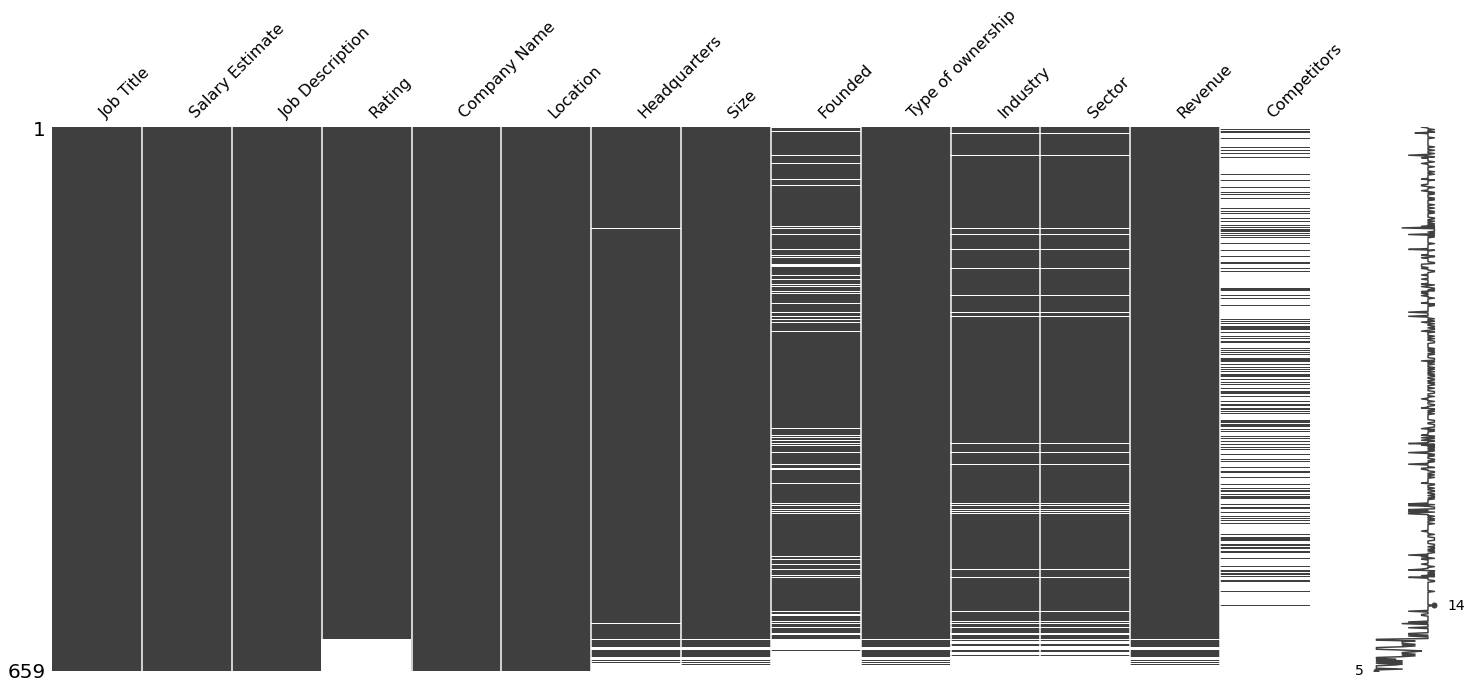

In [60]:
# visualising the missing values to see if there are any patterns
msno.matrix(jobs.sort_values('Rating'))

In [61]:

# It is noted that the rating values are repeated in the Company Name
# The ratings in the Company Name Column will be extracted into a new column and then compared

jobs[['Company Name','Rating in name']]=jobs['Company Name'].str.split('\n',expand=True)

In [62]:
jobs

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Rating in name
index,,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",3.1
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),NaN,4.2
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),NaN,3.8
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",3.5
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,NaN,3.6
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,NaN,JKGT,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,NaN,AccessHope,"Irwindale, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [63]:
#Cross-validating the contents of Rating with the contents of Rating in name

jobs['Rating in name']=jobs['Rating in name'].astype('float') # converting the entries of the Rating in name column to float dtype

jobs[(jobs['Rating']!=jobs['Rating in name']) & (jobs['Rating in name'].notna())]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Rating in name
index,,,,,,,,,,,,,,,
167,Senior Data Analyst,$101K-$165K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJob S...",4.2,Autodesk,"San Francisco, CA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),NaN,4.0
179,Machine Learning Engineer,$56K-$97K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Buckman,"Memphis, TN","Arlington, VA",501 to 1000 employees,1967.0,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),NaN,3.5
308,Data Scientist,$145K-$225K(Employer est.),Data Scientist\n\nRequirements\nMS or PhD in C...,5.0,Kollasoft Inc.,"New York, NY","Irving, TX",Unknown,NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,NaN,3.2


# Comparing the rating values in the company name to the rating values in the Rating column, discrepancies have been found in 3 rows where;
Autodesk has a 4.2 rating
Buckman has a 3.6 rating
Kollasoft Inc. has a 5.0 rating

To solve this issue, all other observations of the 3 companies where the are different ratings are considered

In [20]:
jobs[(jobs['Company Name']=='Autodesk') & (jobs['Rating']!=4.2)]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Rating in name
index,,,,,,,,,,,,,,,
72,Principal Data Scientist,$79K-$131K (Glassdoor est.),Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,1982.0,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),NaN,4.0
103,Senior Data Scientist,$99K-$132K (Glassdoor est.),Job Requisition ID #\n20WD40666\nJob Title\nSe...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,1982.0,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),NaN,4.0
166,Senior Data Analyst,$101K-$165K (Glassdoor est.),Job Requisition ID #\n20WD38079\nJob Title\nSe...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,1982.0,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),NaN,4.0
447,Principal Data Scientist,$69K-$116K (Glassdoor est.),Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,1982.0,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),NaN,4.0
563,Data Science Manager,$128K-$201K (Glassdoor est.),Job Requisition ID #\n20WD38093\nJob Title\nDa...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,1982.0,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),NaN,4.0
592,Senior Data Scientist,$80K-$132K (Glassdoor est.),Job Requisition ID #\n20WD40666\nJob Title\nSe...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,1982.0,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),NaN,4.0


# This implies that the entry with the first discrepancy doesn't belong to Autodesk

In [64]:
jobs[(jobs['Rating']==4.2) & (jobs['Headquarters']=='Herndon, VA') & (jobs['Founded']==1968.0) & \
        (jobs['Company Name']!='Autodesk')]['Company Name'].unique()

array(['ManTech'], dtype=object)

It is a row that belongs to ManTech

In [65]:
# Correcting the company name to ManTech

jobs.loc[(jobs['Rating']==4.2) & (jobs['Headquarters']=='Herndon, VA') & (jobs['Founded']==1968.0), \
        'Company Name']='ManTech'

In [66]:
#Repeating for the two other discrepancies
jobs[(jobs['Company Name']=='Buckman') & (jobs['Rating']!=3.6)]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Rating in name
index,,,,,,,,,,,,,,,
17,Data Scientist,$137K-$171K (Glassdoor est.),Job Success Profile\n\nData Scientist\n\nBuckm...,3.5,Buckman,"Memphis, TN","Memphis, TN",1001 to 5000 employees,1945.0,Company - Private,Chemical Manufacturing,Manufacturing,$500 million to $1 billion (USD),NaN,3.5
178,Data Scientist,$56K-$97K (Glassdoor est.),Job Success Profile\n\nData Scientist\n\nBuckm...,3.5,Buckman,"Memphis, TN","Memphis, TN",1001 to 5000 employees,1945.0,Company - Private,Chemical Manufacturing,Manufacturing,$500 million to $1 billion (USD),NaN,3.5


In [67]:
jobs[(jobs['Rating']==3.6) & (jobs['Headquarters']=='Arlington, VA') & (jobs['Founded']==1967.0) & \
        (jobs['Company Name']!='Buckman')]['Company Name'].unique()

array(['Riverside Research Institute'], dtype=object)

In the second case, the row belongs to Riverside Research Institute

In [68]:
# Correcting the company name to Riverside Research Institute
jobs.loc[(jobs['Rating']==3.6) & (jobs['Headquarters']=='Arlington, VA') & (jobs['Founded']==1967.0),
     'Company Name']='Riverside Research Institute'

In [69]:
jobs[(jobs['Company Name']=='Kollasoft Inc.') & (jobs['Rating']!=5.0)]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Rating in name
index,,,,,,,,,,,,,,,
307,Data Scientist,$145K-$225K(Employer est.),DATA SCIENTIST REMOTE working with occasional ...,3.2,Kollasoft Inc.,United States,"Scottsdale, AZ",1 to 50 employees,NaN,Company - Private,IT Services,Information Technology,$1 to $5 million (USD),NaN,3.2


In [70]:
jobs[jobs['Rating']==5.0]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Rating in name
index,,,,,,,,,,,,,,,
32,Data Scientist,$75K-$131K (Glassdoor est.),Cohere Health is simplifying healthcare for pa...,5.0,Cohere Health,"Boston, MA","Boston, MA",1 to 50 employees,2019.0,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,NaN,5.0
43,Scientist - Molecular Biology,$75K-$131K (Glassdoor est.),ArsenalBio’s mission is to develop efficacious...,5.0,Arsenal Biosciences,"South San Francisco, CA","South San Francisco, CA",51 to 200 employees,2019.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,NaN,5.0
113,Data Engineer,$99K-$132K (Glassdoor est.),"At Phantom AI, experience the fast paced envir...",5.0,Phantom AI,"Burlingame, CA","Burlingame, CA",1 to 50 employees,2016.0,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,NaN,5.0
118,NGS Scientist,$99K-$132K (Glassdoor est.),ArsenalBio’s mission is to develop efficacious...,5.0,Arsenal Biosciences,"South San Francisco, CA","South San Francisco, CA",51 to 200 employees,2019.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,NaN,5.0
130,Data Scientist,$90K-$109K (Glassdoor est.),Intro\n\nWhy this job?\n\n1. Work on a product...,5.0,Notion Labs,"San Francisco, CA","San Francisco, CA",1 to 50 employees,2016.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,NaN,5.0
144,Machine Learning Engineer,$90K-$109K (Glassdoor est.),Machine Learning Engineer\n\nUS Citizenship is...,5.0,"Expedition Technology, Inc.","Herndon, VA","Dulles, VA",1 to 50 employees,2013.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$10 to $25 million (USD),NaN,5.0
193,Data Scientist,$56K-$97K (Glassdoor est.),Job Description\nClient JD below:\n\nWe need a...,5.0,SkillSoniq,"San Francisco, CA","Jersey City, NJ",Unknown,NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,NaN,5.0
209,Data Scientist - TS/SCI FSP or CI Required,$79K-$106K (Glassdoor est.),US Citizenship Required and (TS/SCI with FSP o...,5.0,Phoenix Operations Group,"Annapolis Junction, MD","Woodbine, MD",1 to 50 employees,2011.0,Company - Private,IT Services,Information Technology,$1 to $5 million (USD),NaN,5.0
212,Data Scientist - TS/SCI Required,$79K-$106K (Glassdoor est.),US Citizenship Required and (TS or TS/SCI) Req...,5.0,Phoenix Operations Group,"Baltimore, MD","Woodbine, MD",1 to 50 employees,2011.0,Company - Private,IT Services,Information Technology,$1 to $5 million (USD),NaN,5.0


In [71]:
# For the third case, the company name is not available therefore it will be replaced with np.nan
# The observation with which this discrepancy has the most similarities and not conflicting data is the of 'The Drive Media, Inc.'
jobs.loc[(jobs['Rating']==5.0) & (jobs['Rating in name']==3.2),'Company Name']=np.nan


Suitable replacement for null values in the rating column

In [72]:
# Are there outliers?
print(jobs['Rating'].agg([np.mean,np.median]))

mean      3.88129
median    3.80000
Name: Rating, dtype: float64


In [73]:
# Since mean isn't so far away from median, there isn't much effect of outliers therefore null values in Rating will be ...
# filled with the median

jobs['Rating'].fillna(jobs['Rating'].mean(),inplace=True)

In [74]:
# Checking if no entry in rating column is out of range
jobs['Rating'].agg([min,max])

min    2.0
max    5.0
Name: Rating, dtype: float64

In [75]:
# deleting the 'Rating in name' column
del jobs['Rating in name']

In [76]:
#Dealing with missing values in the Headquarters column
# Viewing the entries with missing headquarters
jobs[jobs['Headquarters'].isna()]['Company Name'].unique()

array(['Covid-19 Search Partners', 'Radical Convergence',
       'The Drive Media, Inc.', 'Point72 Ventures', 'Hatch Data Inc',
       'HireAi', 'Voice', 'Blue Cloak LLC', 'Sophinea',
       'Monte Rosa Therapeutics', 'GrainBridge, LLC',
       'Berico Technologies', 'Kehe Food Distributors', 'Pactera Edge',
       'JKGT', 'AccessHope'], dtype=object)

In [77]:
# Are there other instances where the headquarters of these companies are mentioned?
for j in jobs[jobs['Headquarters'].isna()]['Company Name'].unique():
    if jobs[(jobs['Company Name']==j) &(jobs['Headquarters'].notna())]['Company Name'].count()>0:
        print(jobs[jobs['Company Name']==j])

There aren't any instances of where the headquarters of a company is missing in one observation and present in another

# Dealing with missing values in the Size column

In [78]:
# Viewing the entries with missing sizes
jobs[jobs['Size'].isna()]['Company Name'].unique()

array(['Covid-19 Search Partners', 'Radical Convergence',
       'Point72 Ventures', 'Hatch Data Inc', 'HireAi', 'Blue Cloak LLC',
       'Monte Rosa Therapeutics', 'GrainBridge, LLC',
       'Berico Technologies', 'Kehe Food Distributors', 'Pactera Edge',
       'JKGT', 'AccessHope'], dtype=object)

In [79]:
for j in jobs[jobs['Size'].isna()]['Company Name'].unique():
    if jobs[(jobs['Company Name']==j) &(jobs['Size'].notna())]['Company Name'].count()>0:
        print(jobs[jobs['Company Name']==j])

# There aren't any instances of where the Size of a company is missing in one observation and present in another


In [80]:
#Dealing with missing values in the Founded column
# Viewing the entries with missing sizes
jobs[jobs['Founded'].isna()]['Company Name'].unique()

array(['CareDx', 'Maxar Technologies', 'Covid-19 Search Partners',
       'Radical Convergence', 'SkillSoniq', 'Joby Aviation',
       'Encode, Inc.', 'Surya Systems', 'Predictive Research Inc',
       'Descript', 'Better Hire', 'The Drive Media, Inc.',
       'Trovetechs Inc', 'PETADATA', 'Colony Brands', 'Capio Group',
       'Kollasoft Inc.', nan, 'Advance Sourcing Concepts', 'Microagility',
       'Conch Technologies, Inc', 'Rainmaker Resources, LLC', 'B4Corp',
       'Solving IT International Inc', 'Stride Search', 'Shimento, Inc.',
       'Point72 Ventures', 'Hatch Data Inc', 'SolutionIT, Inc.', 'HireAi',
       'WCG (WIRB-Copernicus Group)', 'Navio', 'PROPRIUS',
       'TECHNOCRAFT Solutions', 'Latitude, Inc.', 'Conflux Systems Inc.',
       'Voice', 'Falcon IT & Staffing Solutions', 'DataLab USA',
       'PeopleCom', 'Blue Icy Water, LLC', 'Sonde Health', 'Maxiom',
       'Hackensack Meridian Health', 'Blue Cloak LLC', 'Numeric, LLC',
       'Centraprise', 'Radiant Digital', 'I

In [81]:
for j in jobs[jobs['Founded'].isna()]['Company Name'].unique():
    if jobs[(jobs['Company Name']==j) &(jobs['Founded'].notna())]['Company Name'].count()>0:
        print(jobs[jobs['Company Name']==j])

# There aren't any instances of where the Size of a company is missing in one observation and present in another

In [82]:
#Repeating same for the other columns with missing values
for j in jobs[jobs['Type of ownership'].isna()]['Company Name'].unique():
    if jobs[(jobs['Company Name']==j) &(jobs['Type of ownership'].notna())]['Company Name'].count()>0:
        print(jobs[jobs['Company Name']==j])

In [83]:
for j in jobs[jobs['Industry'].isna()]['Company Name'].unique():
    if jobs[(jobs['Company Name']==j) &(jobs['Industry'].notna())]['Company Name'].count()>0:
        print(jobs[jobs['Company Name']==j])
for j in jobs[jobs['Revenue'].isna()]['Company Name'].unique():
    if jobs[(jobs['Company Name']==j) &(jobs['Revenue'].notna())]['Company Name'].count()>0:
        print(jobs[jobs['Company Name']==j])
for j in jobs[jobs['Competitors'].isna()]['Company Name'].unique():
    if jobs[(jobs['Company Name']==j) &(jobs['Competitors'].notna())]['Company Name'].count()>0:
        print(jobs[jobs['Company Name']==j])

In [84]:
for q in jobs[jobs['Competitors'].isna()]['Company Name'].unique():
    print(q)

ManTech
Analysis Group
HG Insights
Novartis
iRobot
XSELL Technologies
Old World Industries
Mathematica Policy Research
Guzman & Griffin Technologies (GGTI)
Upside Business Travel
Buckman
Tower Health
Triplebyte
Exponent
Spectrum Communications and Consulting
Oversight Systems
LSQ
MIT Lincoln Laboratory
Kingfisher Systems
Formation
Cohere Health
Acuity Insurance
Puget Sound Energy
Sandhills Global
Great-Circle Technologies
Cambridge Associates, LLC
Cenlar
Arsenal Biosciences
Eversight
Pfizer
Klaviyo
Intellectual Ventures
GovTech
Quick Base
Giving Assistant
IT Concepts
iSeatz
Summa Health System
Benson Hill
Envision LLC
Systems & Technology Research
Bayview Asset Management
Via Transportation
Tempus Labs
Autodesk
Amyris
Powertek
The Mom Project
Lightspeed Systems
Comprehensive Healthcare
Fullpower Technologies, Inc.
Mars
NuWave Solutions
Merrick Bank
QOMPLX
Avlino
Stratagem Group
Evidation
Tecolote Research
Tivity Health
hc1
HP Inc.
AllianceBernstein
Big Huge Games
Maxar Technologies
Pha

# Alternative ways for filling in missing values in the Competitors column

In [85]:
jobs['Competitors']

index
0                EmblemHealth, UnitedHealth Group, Aetna
1                                                    NaN
2                                                    NaN
3      MKS Instruments, Pfeiffer Vacuum, Agilent Tech...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
667                                                  NaN
668                                                  NaN
669                                                  NaN
670                                                  NaN
671                                                  NaN
Name: Competitors, Length: 659, dtype: object

In [86]:
jobs['Competitors'].isnull().sum()

488


488 missing values in Competitors column

In [87]:

# Filling in missing entries with missing values in competitors column
# By making use of instances where the company name has been mentioned as a competitor in a different entry
for q in jobs[jobs['Competitors'].isna()]['Company Name'].unique():
    qval=[]
    qval.append(jobs[jobs['Competitors'].str.contains(q,na=False,regex=False)]['Company Name'].unique())
    newval=''.join(map(str,qval)).strip('[]')
    if len(newval)>0:
        jobs.loc[jobs['Company Name']==q,'Competitors']=newval

In [88]:
jobs['Competitors'].isnull().sum()

469

19 missing values for competitors filled

# Working on the Job Title

In [89]:
# checking the various representation of seniority in the the job title by visualising the unique representations of job title
jobs['Job Title'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

In [90]:
# Creating a seniority column
jobs['Seniority']=jobs['Job Title'].str.contains('Sr.|Senior|Sr')

In [91]:

# Checking visually if there's any title with a seniority requirement that was missed
jobs[~jobs['Seniority']]['Job Title'].unique()

array(['Data Scientist', 'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Data Engineer', 'Associate Data Scientist',
       'Business Intelligence Analyst', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scientist - Ads Data Science',
       'Data Scientist - Intermediate', 'Global Data Analyst',
       'Data & Machine Learning Scientist',
       'Data Sci

# Working on Salary Estimate

In [92]:
# Splitting the salary estimate column into Salary Estimate and the source of salary estimate
jobs[['Salary Estimate','Salary Source']]=jobs['Salary Estimate'].str.split('(',expand=True)

# Cleaning the unwanted ')' off the Salary Source column
jobs['Salary Source']=jobs['Salary Source'].str.strip(')')

jobs['Salary Estimate'].unique()

array(['$137K-$171K ', '$75K-$131K ', '$79K-$131K ', '$99K-$132K ',
       '$90K-$109K ', '$101K-$165K ', '$56K-$97K ', '$79K-$106K ',
       '$71K-$123K ', '$90K-$124K ', '$91K-$150K ', '$141K-$225K ',
       '$145K-$225K', '$79K-$147K ', '$122K-$146K ', '$112K-$116K ',
       '$110K-$163K ', '$124K-$198K ', '$79K-$133K ', '$69K-$116K ',
       '$31K-$56K ', '$95K-$119K ', '$212K-$331K ', '$66K-$112K ',
       '$128K-$201K ', '$138K-$158K ', '$80K-$132K ', '$87K-$141K ',
       '$92K-$155K ', '$105K-$167K '], dtype=object)

In [93]:
jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Seniority,Salary Source
index,,,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",True,Glassdoor est.
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),'The Buffalo Group' 'CACI International',False,Glassdoor est.
2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),NaN,False,Glassdoor est.
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",False,Glassdoor est.
4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",False,Glassdoor est.


In [94]:
#changing category of of Glassdoor Salary Estimate
jobs['Salary Estimate'].astype('category')

index
0      $137K-$171K 
1      $137K-$171K 
2      $137K-$171K 
3      $137K-$171K 
4      $137K-$171K 
           ...     
667    $105K-$167K 
668    $105K-$167K 
669    $105K-$167K 
670    $105K-$167K 
671    $105K-$167K 
Name: Salary Estimate, Length: 659, dtype: category
Categories (30, object): ['$101K-$165K ', '$105K-$167K ', '$110K-$163K ', '$112K-$116K ', ..., '$91K-$150K ', '$92K-$155K ', '$95K-$119K ', '$99K-$132K ']

In [95]:
# splitting salary estimate column into minimum and maximum salary
jobs[['min salary','max salary']]=jobs['Salary Estimate'].str.split('-',expand=True)

#converting the min and max salary to integers
jobs['min salary']=jobs['min salary'].str.replace('$','').str.replace('K','').astype('int')
jobs['max salary']=jobs['max salary'].str.replace('$','').str.replace('K','').astype('int')

C:\Users\joan\AppData\Local\Temp\ipykernel_12436\302702551.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  jobs['min salary']=jobs['min salary'].str.replace('$','').str.replace('K','').astype('int')
C:\Users\joan\AppData\Local\Temp\ipykernel_12436\302702551.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  jobs['max salary']=jobs['max salary'].str.replace('$','').str.replace('K','').astype('int')


In [96]:
# creating the average salary column
jobs['average salary']=(jobs['min salary']+jobs['max salary'])/2

In [97]:
# adding the dollar sign and K to the average salary, minimum salary and maximum salary
columns_to_edit=['average salary','min salary','max salary']
for i in columns_to_edit:
    jobs[i]='$'+ jobs[i].astype('str') + 'K'

In [98]:
#viewing the changes
jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Seniority,Salary Source,min salary,max salary,average salary
index,,,,,,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",True,Glassdoor est.,$137K,$171K,$154.0K
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),'The Buffalo Group' 'CACI International',False,Glassdoor est.,$137K,$171K,$154.0K
2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),NaN,False,Glassdoor est.,$137K,$171K,$154.0K
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",False,Glassdoor est.,$137K,$171K,$154.0K
4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",False,Glassdoor est.,$137K,$171K,$154.0K


# Working on Job description Column

In [99]:
# removing the unwanted values in the column
jobs['Job Description']=jobs['Job Description'].str.replace('\n',' ')

# Working on Founded Column

In [100]:
# Converting the founded column to datetime
jobs['Founded']=pd.to_datetime(jobs['Founded'],format='%Y',errors='coerce').dt.strftime('%Y')

In [101]:
# Creating a company age column
jobs['Company Age']=int(dt.date.today().year)-jobs['Founded'].astype('float')

In [102]:
jobs

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Seniority,Salary Source,min salary,max salary,average salary,Company Age
index,,,,,,,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K,Description The Senior Data Scientist is resp...,3.10000,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",True,Glassdoor est.,$137K,$171K,$154.0K,30.0
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future Join th...",4.20000,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),'The Buffalo Group' 'CACI International',False,Glassdoor est.,$137K,$171K,$154.0K,55.0
2,Data Scientist,$137K-$171K,Overview Analysis Group is one of the larges...,3.80000,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),NaN,False,Glassdoor est.,$137K,$171K,$154.0K,42.0
3,Data Scientist,$137K-$171K,JOB DESCRIPTION: Do you have a passion for Da...,3.50000,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",False,Glassdoor est.,$137K,$171K,$154.0K,23.0
4,Data Scientist,$137K-$171K,Data Scientist Affinity Solutions / Marketing ...,2.90000,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",False,Glassdoor est.,$137K,$171K,$154.0K,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K,Summary We’re looking for a data scientist to...,3.60000,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,NaN,False,Glassdoor est.,$105K,$167K,$136.0K,34.0
668,Data Scientist,$105K-$167K,Job Description Become a thought leader within...,3.88129,JKGT,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Glassdoor est.,$105K,$167K,$136.0K,NaN
669,Data Scientist,$105K-$167K,Join a thriving company that is changing the w...,3.88129,AccessHope,"Irwindale, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Glassdoor est.,$105K,$167K,$136.0K,NaN


In [103]:
companyages=jobs['Company Age'].unique()
print(jobs['Company Age'].max(),jobs['Company Age'].min())

242.0 4.0


In [104]:
jobs.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded               object
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Seniority               bool
Salary Source         object
min salary            object
max salary            object
average salary        object
Company Age          float64
dtype: object